## I. Introduction

On April 15, 1912, RMS Titanic collided with an iceberg during her sail in the Atlantic Ocean. Ironically thought of as undestructable,  she sank due to the collision, which killed 1502 of 2224 passengers. One of the main reasons that many passengers persihed is due to the fact that there were not enough lifeboats for the passengers and crew members. Survival of passengers may be mostly due to luck, but survival chance is much higher for some groups such as women, children, and upper class people. 

The goal of this exercise is to predict the survival (live or die) of Titanic passengers based on 12 different variables (passsenger ID, survived, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked) included in the Titanic Kaggle training and testing dataset using different machine learning algorithms. In this exercise, 4 different models will be compared for prediction:Logistic Regression, Random Forests and Gradient Boosting Machine (which are both tree-based decision models), and Voting Classfier. The performance of each of the models will be determined via the evaluation metrics of confusion matrix and ROC Curve. 

## II. Data Preprocessing/Exploratory Data Analysis

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as ske
import tensorflow as tf
from tensorflow.contrib import learn as skflow

In [36]:
titanic_dataset = pd.read_csv('training_set.csv')
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titanic_dataset.shape #training data set is composed of 12 variables and 891 individuals

(891, 12)

In [46]:
titanic_dataset.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

### Survival by Passenger Class, Fare, Gender, and Age

First and foremost, what was the overall average percentage of surviving from the Titanic tragedy?

In [47]:
titanic_dataset['Survived'].mean()

0.3838383838383838

Data shows that there is an overall 38% chance of surviving. However, exploring the dataset in more depth reveals that certain populations in the ship were more likely to survive. 

#### Passenger Class

In [63]:
pass_class = titanic_dataset.groupby('Pclass').mean()
pass_class

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


Text(0,0.5,'Survival Percentage')

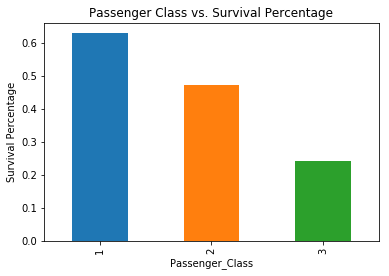

In [62]:
pass_class['Survived'].plot.bar()
plt.title('Passenger Class vs. Survival Percentage')
plt.xlabel('Passenger_Class')
plt.ylabel('Survival Percentage')

Text(0,0.5,'Fare')

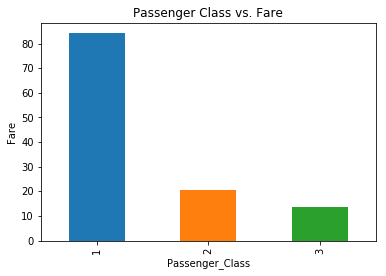

In [128]:
pass_class['Fare'].plot.bar()
plt.title('Passenger Class vs. Fare')
plt.xlabel('Passenger_Class')
plt.ylabel('Fare')

The first graph above shows that passengers belonging to passenger class 1 had the highest survival percentage, followed by individuals in passenger class 2 and then 3. It could then be seen in the second graph above that economic/income status of passengers are also stratified beased on the passenger class because passengers in class 1 paid the most at an average of 84 euros, while passengers in class 2 and 3 paid an average of 20 and 13 euros, respectively. Other than the passenger class itself, is there a difference in the survival percentage amongst genders?

#### Gender (and Passenger Class)

In [61]:
pclass_sex = titanic_dataset.groupby(['Pclass','Sex']).mean()
pclass_sex

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

Text(0,0.5,'Survival Percentage')

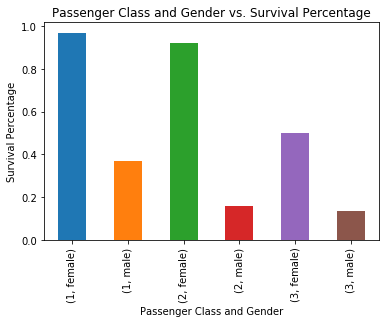

In [65]:
pclass_sex['Survived'].plot.bar()
plt.title('Passenger Class and Gender vs. Survival Percentage')
plt.xlabel('Passenger Class and Gender')
plt.ylabel('Survival Percentage')

Regardless of passenger class, females had a higher survival probability than males. 

#### Age

Aside from passenger class and gender, another factor that could have affected survival of a passenger is age. In this case, age is binned by 10 (e.g. 0-10 years old belong to one bin)

Text(0,0.5,'Survival Percentage')

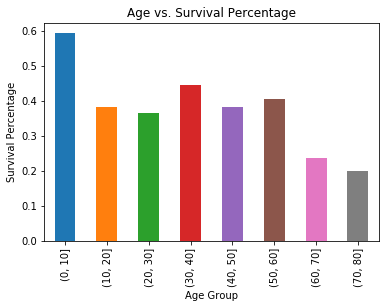

In [67]:
age_factor = pd.cut(titanic_dataset["Age"], np.arange(0, 90, 10))
age_factor = titanic_dataset.groupby(age_factor).mean()
age_factor['Survived'].plot.bar()
plt.title('Age vs. Survival Percentage')
plt.xlabel('Age Group')
plt.ylabel('Survival Percentage')

It can be seen here that the youngest passengers (age group 0-10) had the highest survival percentage. 

Overall, the analysis performed in this section reveal three important factors that affect survival percentage: 
* Passengers in class 1 (who were also probably the wealthiest individuals) had the highest survival probability relative to the other passenger classes. This may due to the fact that passenger class 1 area was more equipped with boat safety tools and equipments, and mostly had easier access to the lifeboats-considering the fact that they are paying an average of 84 euros per passenger. 
* Regardless of passenger class, it was revealed that females and individuals in the age group of 0-10 had a higher survival percentage relative to males and the older age groups. These may attributed to the fact that the ship officers prioritized evacuation of females and children. 

### Data Preprocessing

The following strategies will be implemented to the dataset before performing machine learning techniques. 
* Remove variables that have more than 50% missingess
* For the variables that remain, drop rows with NA values.
* Remove variables that are string non-categorical variables
* Convert categorical variables into integers (e.g. Male=0 and Female=1)

In [68]:
titanic_dataset.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In this case, the 'Cabin' variable will be dropped because it has more than 50% missingness. In addition, the 'PassengerId' variable will also be dropped due to the fact that it is only a sequential count of the passengers, which have no predictive value. 

In [69]:
titanic_dataset.drop('PassengerId', axis=1, inplace=True) # drop PassengerID variable and Cabin variable
titanic_dataset.drop('Cabin', axis=1, inplace=True)

In [76]:
titanic_dataset_final = titanic_dataset.dropna() # drop rows with NA values

In [79]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex) #convert the sex variable into integers 1= Male and 0=Female
    processed_df.Embarked = le.fit_transform(processed_df.Embarked) # convert the embarked variable into S=2, C=0, Q=1
    processed_df = processed_df.drop(['Name','Ticket'],axis=1)
    return processed_df

titanic_final= preprocess_titanic_df(titanic_dataset_final)

In [80]:
titanic_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In the end, there are only 8 variables left in after all the preprocessing have been. These can now been subjected to machine learning algorithms. 

## III. Machine Learning Implementations

For all 4 models(Logistic Regression, Random Forests, Gradient Boosting Machine, and Voting Classifier) that will be explored in this section, the variable that will be predicted is the "Survived" variable (0=No and 1=Yes) and the predictive variables are the remaining 7 other variables mentioned in the earlier section. It is important to divide the Titanic dataset into training set and test set. In this case, 80% would be dedicated as the training set and the other 20% will be for testing set. To prevent overfitting or underfitting and bias, the data will be randomly split into k folds. For example,  if 10 folds are specified, then the data is split into 10 partitions. The model will be trained on 9 out of 10 partitions and the model will be tested on the 10th partition. In general, a smaller k is more biased, but a larger k can be very variable. For the purpose of this analysis, 10-fold cross validation will be implemented and, just like in the real Kaggle Titanic competition, the average accuracy of the performance of each of the models will be  determined as the main evaluation metric. 

In [81]:
x = titanic_final.drop(['Survived'], axis=1).values # 7 other variables to be used for prediction
y = titanic_final['Survived'].values #variable to be predicted, which in this case is survival

In [108]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2) #split dataset into 80% training set and 20% as test set

### Logistic Regression

* For the first model, logistic regression will be trained and tested. Logistic regression models are the go-to method for binary classification problems, which in this case is predicting survival (yes or no). 

In [113]:
logreg_cv = LogisticRegressionCV()
scores = cross_val_score(logreg_cv, x_train, y_train, cv=10, scoring = "accuracy") #10-fold cross validation and accuracy as metric
print("Scores:", scores) #performance score for each of the folds
print("Mean:", scores.mean()) #mean of the performance of each of the folds. 
print("Standard Deviation:", scores.std())

Scores: [0.74137931 0.85964912 0.73684211 0.84210526 0.80701754 0.71929825
 0.77192982 0.77192982 0.80357143 0.76785714]
Mean: 0.7821579811597961
Standard Deviation: 0.04330889809956746


The average accuracy of the logistic regression model from 10-fold cross validation is 78.21%. 

### Random Forests

* The second model that will be trained is random forests. By definition, random forests are an ensemble of decision trees, which prevents overfitting to the training set by combining predictions from different algorithms (decision trees) in majority vote fashion. 

In [104]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy") #10-fold cross validation and accuracy as metric
print("Scores:", scores) #performance score for each of the folds
print("Mean:", scores.mean()) #mean of the performance of each of the folds. 
print("Standard Deviation:", scores.std())

Scores: [0.77586207 0.77586207 0.87719298 0.84210526 0.78947368 0.78947368
 0.84210526 0.80357143 0.73214286 0.75      ]
Mean: 0.7977789300838303
Standard Deviation: 0.04237849031308905


* Random forests model produces an average accuracy of 79.77%, which is ~1% better than logistic regression. 

### Gradient Boosting Machine

* Another type of tree-based model is gradient boosting machine. It is also a collection of trees, but boosting grows the tree sequentially.

In [109]:
gb = ske.GradientBoostingClassifier(n_estimators=50)
scores = cross_val_score(gb, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75862069 0.87719298 0.78947368 0.87719298 0.80701754 0.78947368
 0.8245614  0.80701754 0.80357143 0.875     ]
Mean: 0.8209121942788006
Standard Deviation: 0.039771444336639025


The gradient boosting model has produced an average accuracy of 82.09%, which, so far, is the best model amongst the three models explored. 

### Voting Classifier

* The fourth and final model that will trained and tested is the voting classifier. This algorithm allows for soft voting/majority rule for classification. 

In [110]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
scores = cross_val_score(eclf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

C:\Users\Guzman Family\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Guzman Family\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Guzman Family\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Guzman Family\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is a

Scores: [0.75862069 0.89473684 0.77192982 0.87719298 0.80701754 0.80701754
 0.8245614  0.78947368 0.82142857 0.83928571]
Mean: 0.8191264799930862
Standard Deviation: 0.04073192142230986


C:\Users\Guzman Family\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


* The average accuracy of the voting classifer is at 81.91%, which ranks the second best prediction performance amongst the 4 models utilized previously. 

## IV. Conclusion/Application

In this analysis, the goal was to predict the survival of Titanic passengers based on the 12 variables of passsenger ID, survived, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked. Upon data pre-procesing and data analysis, the variables of passenger ID, name, cabin, and ticket were dropped from the final predictive variables due to the fact that their data is missing more than 50% or the datatype is a non-categorical string. 

The variables of pclass, sex, age, sibsp, parch, fare, and embarked were utilized to predict survival. 4 different machine learning algorithms were compared and here are their predictive accuracies:
* Logistic Regression: 78.21%
* Random Forests: 79.77%
* Gradient Boosting Machine: 82.09%
* Voting Classifier: 81.91%

Overall, the gradient boosting machine was the most accurate model in predicting survival. By inspecting the importance features in the model, it could be seen that the top 4 most predictive variables for survival are age, fare, sex, and passenger class. In other words, the age and gender, and passenger class (and subsequently how much they paid) determined if they will perish or survive from the sinking of Titanic. 


In [137]:
x_model = titanic_final.drop(['Survived'], axis=1) # 7 other variables to be used for prediction
y_model = titanic_final['Survived'] #variable to be predicted, which in this case is survival
gb = ske.GradientBoostingClassifier(n_estimators=50)
gb = gb.fit(x_model, y_model)

feature_importances = pd.DataFrame(gb.feature_importances_,
                                   index = x_model.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importance = pd.DataFrame(feature_importances)
feature_importance

,importance
Age,0.289978
Fare,0.259517
Sex,0.228407
Pclass,0.128958
SibSp,0.064147
Embarked,0.026008
Parch,0.002984


This feature importance table corroborates the fact that certain populations of passengers have a higher percentage of survival than other passengers, which was enumerated in the Exploratory Data Analysis section. Specifically:

1. Individuals in passenger class 1 had the highest chance of surviving that individuals in passenger class 2, and 3.
2. Individuals in passenger class 1 paid the highest fare (followed by passenger class 2 and 3), and therefore, it could be deduced that the passenger class arrangement also reflected the socieconomic status of the passengers. 
3. Females and children had a higher percentage of survival than men and older individuals. 

But why?

Evidence has shown that lifeboats were a luxury for the first class passenger area. Lifeboats were launched first from the first class area then second class, and there was no dedicated lifeboats for the third class. In fact, 6 out of the 20 lifeboats launched only contained first class passengers. As for the explanation for survival differences among age groups and gender, evidence has shown that there was a "women and children first" rule, which was a maritime tradition; this means that women and children were evacuated first than men and older individuals. 

Knowing the fact the certain populations had a higher chance of *not surviving*, a number of interventions could have been employed to affect the outcomes:

1. First of all, the Titanic should be more equipped more with lifeboats and they should be distributed evenly regardless of passenger class. Deployment in emergency situations should be also done alternately amongst passenger class areas (i.e. not deploying from one passenger class only at a time).
2. Secondly, the crew members should have not abided by the "women and chidlren first rule." Everybody, regardless of gender and age, have equal prioratization when being loaded into lifeboats.

## VII. References

* https://www.dataquest.io/blog/kaggle-fundamentals/ 
* https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html